In [1]:
# LUNH algorithm 

In [2]:
# The basic Idea behind LUNH algorithm is to group together the important words[important words are calculated using frequency]
# in a sentence[ while grouping in a sentence we make use of indexes and distance between important words]
#  and then calculate the scores based of the groupings and the group with larger score is selceted to be given the highest 
# score and that score is assigned to the entire sentence and this way we calculate the sentences with scores and 
# then use these sentences to create summary.
# Simply it states that the words that are important you square them and divide by total number of words in the sentence 

In [28]:
# get_data and preprocess_data have the same code as Frequency-Based-Summarizer but we may alter it based on needs of this program

In [25]:
# LibrRIES
from goose3 import Goose
from nltk import sent_tokenize
import string
import nltk
import pint
ureg=pint.UnitRegistry()
stopwords = nltk.corpus.stopwords.words('english')
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd   

In [26]:
def get_data():
    while True:
        print("1. For Url Based summarizing using wikipedia\n")
        print("2. For Input Text from your keyboard\n ")
        print("3.QUIT\n")
        try:
            choice = input("Enter your choice\n") 
            if int(choice) == 1:
                url=input("Enter the word to be searched on wikipedia \n") 
                url =f'https://en.wikipedia.org/wiki/{url}'
                try:
                    text=Goose().extract(url).cleaned_text
                    return text
                except:
                    print(" Wrong URL format")
            elif int(choice) ==2:
                text = input("Input the copied text")
                return text
            elif int(choice) ==3:
                print("bye\n") 
                break
            else:
                print(" wrong choice enetered, Exiting the Program \n")
                break
        except:
            print(" Input Not a number, Quitting the program")
            break

In [102]:
# Because w eneed sentences for this we are not going to remove the . which seprates the sentences 
punct=string.punctuation
def preprocess_data(text):
    text=text.replace('\n','')
    text=text.lower() 
    text=sent_tokenize(text)
    save_text = text # original text
    translator = str.maketrans('','', punct+ '0123456789'+'•°'+'─') 
    clean_text=[]
    for i in text:
        a=i.translate(translator)
        clean_text.append(a) 
    # so we have punctuation free etxt here, now we need to remove stopwords and units from it.
    cleaner_text=[]
    for i in clean_text:
        l=[]
        for j in i.split():
            if j not in stopwords+list(ureg):
                l.append(j)
        cleaner_text.append(' '.join(l)) 
# cleaner text have no stopwords and most of the symbols of the data have been removed there fore we can use this cleaner text
# for getting the scores for our data.
    text = ' '.join(cleaner_text)    
    tokens=text.split()
    print(f"Total data that we are taking in consideration is {len(tokens)}\n") 
    print(f" Unique words in our data is {len(set(tokens))}\n")
    tokenizer= Tokenizer()
    tokenizer.fit_on_texts(tokens)
    tokenized_text=tokenizer.texts_to_sequences(tokens)# Giving the clean text number represenattion
    # but for frequency based summariziation we only need the frequency count from tokenizer.
    freq_dataframe = pd.DataFrame(list(tokenizer.word_counts.items()),columns=['Words','Count'])
    # we need the frequency, with their word counts 
    return cleaner_text,freq_dataframe,save_text
# here we are sending the frequency of accurance of each word in the data.

In [65]:
text1=get_data()

1. For Url Based summarizing using wikipedia

2. For Input Text from your keyboard
 
3.QUIT

Enter your choice
1
Enter the word to be searched on wikipedia 
cake


In [103]:
cleaner_text,fdf,original_text=preprocess_data(text1)

Total data that we are taking in consideration is 1257

 Unique words in our data is 685



In [104]:
cleaner_text

['cake flour confection made flour sugar ingredients usually baked',
 'oldest forms cakes modifications bread cakes cover wide range preparations simple elaborate share features desserts pastries meringues custards piesthe common ingredients include flour sugar eggs fat butter oil margarine liquid leavening agent baking soda baking powder',
 'common additional ingredients include dried candied fresh fruit nuts cocoa extracts vanilla numerous substitutions primary ingredients',
 'cakes also filled fruit preserves nuts dessert sauces like custard jelly cooked fruit whipped cream syrups iced buttercream icings decorated marzipan piped borders candied fruitcake often served celebratory dish ceremonial occasions weddings anniversaries birthdays',
 'countless cake recipes breadlike rich elaborate many old',
 'cake making longer complicated procedure one time considerable labor went cake making particularly whisking egg foams baking equipment directions simplified even amateur cooks may bake 

In [105]:
fdf # Now we need to calculate the indexe's and give the sentences scores accordingly.

,Words,Count
0,cake,67
1,flour,18
2,confection,1
3,made,15
4,sugar,13
...,...,...
680,needs,1
681,foods,1
682,dictionary,1
683,definition,1


In [106]:
fdf.sort_values(by='Count',inplace=True,ascending=False)

In [107]:
fdf.reset_index(drop=True,inplace=True)

In [108]:
fdf # based on the counts we can control the fact that how much words be considered as important, like words who have counts 
# more than 15 like this we can control the summarizinng conditions
# based on this I can get my creative dataframe by taking only those values that I seem the count as important.

,Words,Count
0,cake,67
1,cakes,50
2,flour,18
3,made,15
4,butter,15
...,...,...
680,whites,1
681,uses,1
682,cooks,1
683,yeastangel,1


In [109]:
creative_word_df=fdf[fdf['Count'] >=5] # this here acts as an hyperparameter that we need to use in order to set the words.

In [110]:
creative_word_df # Now we need to map these values as to find the groups in the sentences for that we will need the origonal sen
# tences to work on.

,Words,Count
0,cake,67
1,cakes,50
2,flour,18
3,made,15
4,butter,15
5,sugar,13
6,eggs,13
7,sponge,12
8,baking,11
9,bread,10


In [111]:
l=creative_word_df['Words']

In [112]:
l.values

array(['cake', 'cakes', 'flour', 'made', 'butter', 'sugar', 'eggs',
       'sponge', 'baking', 'bread', 'icing', 'may', 'include', 'use',
       'also', 'chocolate', 'sometimes', 'baked', 'using', 'ingredients',
       'called', 'powder', 'often', 'piping', 'decorating', 'fat',
       'flowers', 'one', 'used', 'fruit'], dtype=object)

In [121]:
def assign_scores(sentence): 
    a=sentence.split()
    imp_words=[]
    scores=[]
    for i in range(len(a)):
        if a[i] in l.values:
            imp_words.append(i)
    scores.append(len(imp_words)**2/len(a))
    return scores[0]
        

In [122]:
assign_scores(cleaner_text[0])# Using this we are getting scores based of important words in a sentence.

5.444444444444445

In [128]:
scores_of_all_sentences=[]
for i in cleaner_text:
    scores_of_all_sentences.append(assign_scores(i))

In [129]:
final_scores=[]
summm=sum(scores_of_all_sentences)
for i in scores_of_all_sentences:
    final_scores.append(i/summm)

In [131]:
sum(final_scores) # approximately 1 only.

1.0000000000000007

In [132]:
len(original_text)==len(cleaner_text) # This just tells us whetehr we can append the sxores directly to the original sentences.

True

In [136]:
final_df=pd.DataFrame(data=original_text,columns=['Text'])

In [137]:
final_df['Scores']=final_scores

In [138]:
final_df.sort_values(by='Scores',ascending=False,inplace=True)

In [139]:
final_df

,Text,Scores
38,"[15]chocolate cakes are butter cakes, sponge c...",0.051229
24,"[5]butter cakes are made from creamed butter, ...",0.046486
0,"cake is a flour confection made from flour, su...",0.041321
42,these cakes often have a crumb topping called ...,0.039032
26,[11] a classic pound cake is made with a pound...,0.039032
...,...,...
14,[5] latin poet ovid refers to his and his brot...,0.000632
17,"[7]during the great depression, there was a su...",0.000506
85,commercial cakes are frequently and commonly e...,0.000446
6,"the word itself is of viking origin, from the ...",0.000000


In [160]:
def get_summary(sum_per=0.5):
    m=0
    for i in range(len(final_df)):
        if m <=sum_per:
            m+=final_df['Scores'][i] 
            print(final_df['Text'][i])
            

In [164]:
get_summary(sum_per=0.1) 

cake is a flour confection made from flour, sugar, and other ingredients, and is usually baked.
in their oldest forms, cakes were modifications of bread, but cakes now cover a wide range of preparations that can be simple or elaborate, and which share features with desserts such as pastries, meringues, custards, and pies.the most common ingredients include flour, sugar, eggs, fat (such as butter, oil or margarine), a liquid, and a leavening agent, such as baking soda or baking powder.
common additional ingredients include dried, candied, or fresh fruit, nuts, cocoa, and extracts such as vanilla, with numerous substitutions for the primary ingredients.
cakes can also be filled with fruit preserves, nuts or dessert sauces (like custard, jelly, cooked fruit, whipped cream or syrups),[1] iced with buttercream or other icings, and decorated with marzipan, piped borders, or candied fruit.cake is often served as a celebratory dish on ceremonial occasions, such as weddings, anniversaries, and 

In [24]:
import matplotlib.pyplot as plt 
import wordcloud

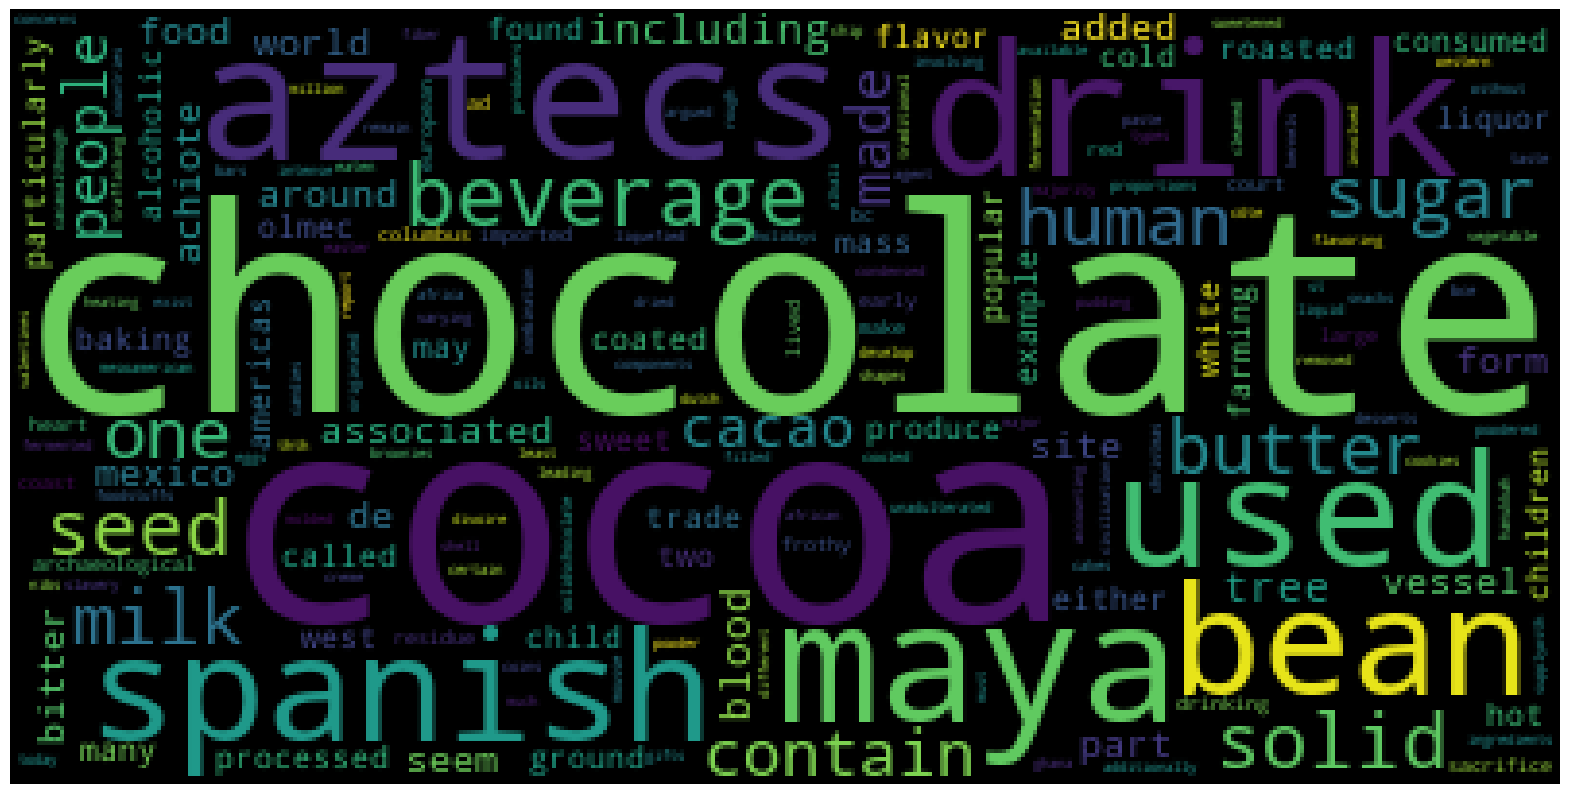

In [8]:
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(wordcloud.WordCloud().generate(text)); 
# word cloud is helpful to find stopwords that are not very helpful.